# Weak Learners on 2-D Fisher Iris Data Classification

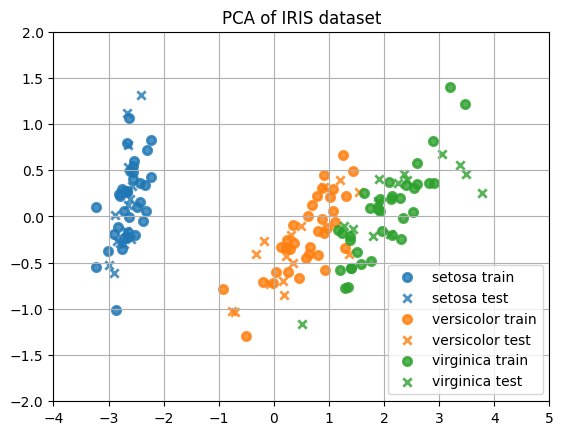

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

# Reduce data to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train,y_train)
X_test_pca = pca.transform(X_test)
X_pca = np.vstack((X_train_pca,X_test_pca))

# Visualize the reduced training and test data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                color=color, alpha=0.8, lw=2, label=f"{target_name} train")
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=f"{target_name} test", marker='x')

plt.axis([-4, 5, -2, 2])
plt.legend(loc="best", shadow=False)
plt.title("PCA of IRIS dataset")
plt.grid()
plt.show()

## Perform k-Nearest Neighbors

kNN for k = 1
  Training Accuracy: 1.0
  Testing Accuracy: 0.9555555555555556
  Training: Confusion Matrix
[[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
kNN for k = 3
  Training Accuracy: 0.9904761904761905
  Testing Accuracy: 0.9555555555555556
  Training: Confusion Matrix
[[35  0  0]
 [ 0 34  1]
 [ 0  0 35]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
kNN for k = 5
  Training Accuracy: 0.9809523809523809
  Testing Accuracy: 0.9333333333333333
  Training: Confusion Matrix
[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
kNN for k = 10
  Training Accuracy: 0.9714285714285714
  Testing Accuracy: 0.9111111111111111
  Training: Confusion Matrix
[[35  0  0]
 [ 0 34  1]
 [ 0  2 33]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


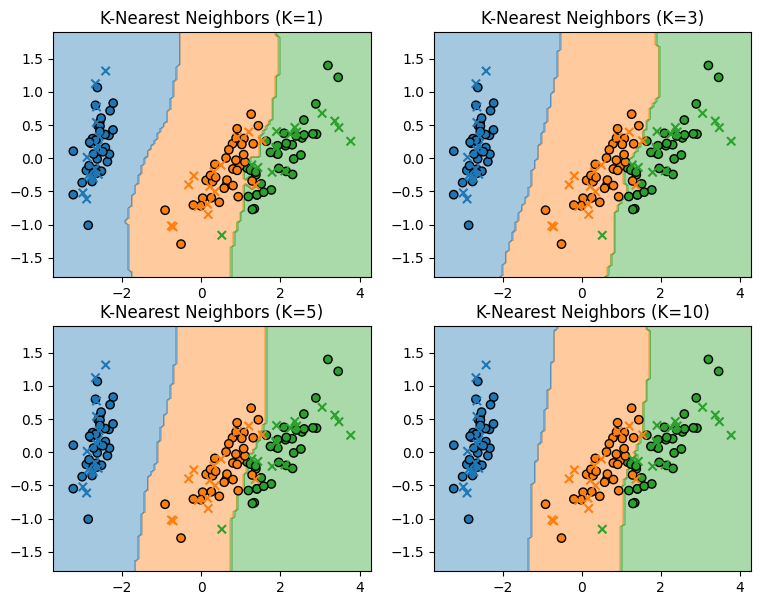

In [2]:
i = 1
figure = plt.figure(figsize=(9, 7))
for neigh in np.array([1, 3, 5, 10]):
    knn = KNeighborsClassifier(n_neighbors=neigh)
    knn.fit(X_train_pca, y_train)
    print(f"kNN for k = {neigh}")
    print(f"  Training Accuracy: {knn.score(X_train_pca,y_train)}")
    print(f"  Testing Accuracy: {knn.score(X_test_pca,y_test)}")

    print('  Training: Confusion Matrix')
    print(confusion_matrix(y_train, knn.predict(X_train_pca)))
    print('  Testing: Confusion Matrix')
    print(confusion_matrix(y_test, knn.predict(X_test_pca)))

    ax = plt.subplot(2,2,i)
    cm = ListedColormap(colors)
    DecisionBoundaryDisplay.from_estimator(knn, X_pca, cmap=cm, ax=ax, alpha=0.4, eps=0.5)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm, edgecolors="k")
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm, marker='x')
    plt.title(f"K-Nearest Neighbors (K={neigh})")
    i += 1

plt.show()

## Perform Gaussian Naive-Bayes Classifier 

Gaussian Naive Bayes Classifier
  Training Accuracy: 0.9047619047619048
  Testing Accuracy: 0.9111111111111111
  Training: Confusion Matrix
[[35  0  0]
 [ 0 32  3]
 [ 0  7 28]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


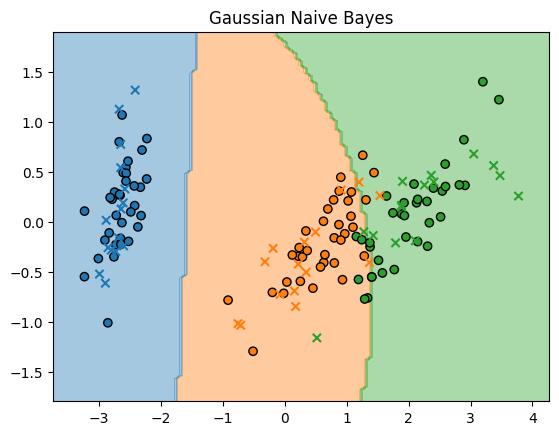

In [3]:
gnb = GaussianNB().fit(X_train_pca, y_train)
print('Gaussian Naive Bayes Classifier')
print(f"  Training Accuracy: {gnb.score(X_train_pca,y_train)}")
print(f"  Testing Accuracy: {gnb.score(X_test_pca,y_test)}")

print('  Training: Confusion Matrix')
print(confusion_matrix(y_train, gnb.predict(X_train_pca)))
print('  Testing: Confusion Matrix')
print(confusion_matrix(y_test, gnb.predict(X_test_pca)))

DecisionBoundaryDisplay.from_estimator(gnb, X_pca, cmap=cm, alpha=0.4, eps=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm, edgecolors="k")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm, marker='x')
plt.title('Gaussian Naive Bayes')
plt.show()

## Perform Decision Tree Classifier

Decision Tree (max_depth = 1)
  Training Accuracy: 0.6666666666666666
  Testing Accuracy: 0.6666666666666666
  Training: Confusion Matrix
[[35  0  0]
 [ 0 35  0]
 [ 0 35  0]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0 15  0]]
Decision Tree (max_depth = 2)
  Training Accuracy: 0.9619047619047619
  Testing Accuracy: 0.9111111111111111
  Training: Confusion Matrix
[[35  0  0]
 [ 0 31  4]
 [ 0  0 35]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
Decision Tree (max_depth = 3)
  Training Accuracy: 0.9619047619047619
  Testing Accuracy: 0.9111111111111111
  Training: Confusion Matrix
[[35  0  0]
 [ 0 31  4]
 [ 0  0 35]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
Decision Tree (max_depth = 5)
  Training Accuracy: 1.0
  Testing Accuracy: 0.8888888888888888
  Training: Confusion Matrix
[[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
  Testing: Confusion Matrix
[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]


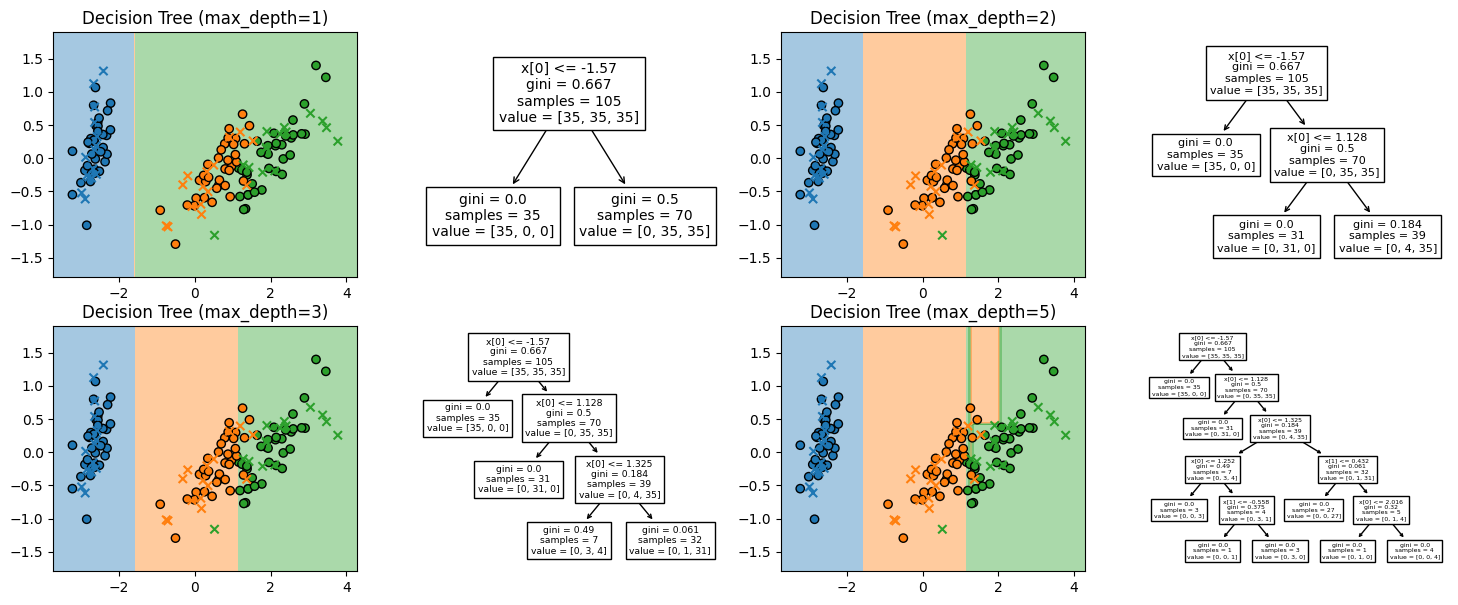

In [4]:
i = 1
figure = plt.figure(figsize=(18, 7))
for m in np.array([1, 2, 3, 5]):
    tree = DecisionTreeClassifier(max_depth=m, random_state=0)
    tree.fit(X_train_pca, y_train)
    print(f"Decision Tree (max_depth = {m})")
    print(f"  Training Accuracy: {tree.score(X_train_pca,y_train)}")
    print(f"  Testing Accuracy: {tree.score(X_test_pca,y_test)}")

    print('  Training: Confusion Matrix')
    print(confusion_matrix(y_train, tree.predict(X_train_pca)))
    print('  Testing: Confusion Matrix')
    print(confusion_matrix(y_test, tree.predict(X_test_pca)))
    
    ax = plt.subplot(2,4,2*i-1)
    cm = ListedColormap(colors)
    DecisionBoundaryDisplay.from_estimator(tree, X_pca, cmap=cm, ax=ax, alpha=0.4, eps=0.5)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm, edgecolors="k")
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm, marker='x')
    plt.title(f"Decision Tree (max_depth={m})")
    ax = plt.subplot(2,4,2*i)
    plot_tree(tree)
    i += 1

plt.show()